In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_10058.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_11023.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_4462.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_10255.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_8931.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_5907.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_5048.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_845.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_7659.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_10889.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_8092.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_147.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_3625.jpg
/kaggle/input/waste-cla

In [3]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("Is GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.17.1
Is GPU Available: []


In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [8]:
train_path = "/kaggle/input/waste-classification-data/DATASET/TRAIN"
test_path = "/kaggle/input/waste-classification-data/DATASET/TEST"

In [10]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [15]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 12565/12565 [01:37<00:00, 128.66it/s]


In [16]:
data.shape

(22564, 2)

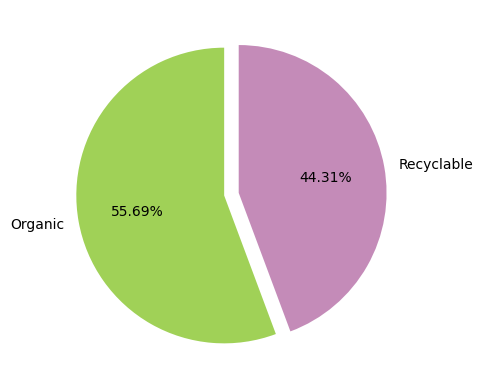

In [19]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors=colors, startangle=90, explode=[0.05, 0.05])
plt.show()